In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# 1. Barlow Twins code에 쓰인 (non-pytorch related) modules공부하기



## 1.1. main.py의 것들
1. `os.environ, os.getenv`
2. `signal` module
3. subprocess


### 1.1.1. `os.environ`, `os.getenv`
linux돌리때 쓰이는 환경같은 것을 가져오는 듯

In [21]:
import os
os.environ #gets os environment (.conf의 그것들)

environ{'SHELL': '/bin/bash',
        'CONDA_EXE': '/usr/anaconda3/bin/conda',
        '_CE_M': '',
        'PWD': '/scratch/connectome/study_group/VAE_ADHD',
        'LOGNAME': 'dyhan316',
        'XDG_SESSION_TYPE': 'tty',
        'CONDA_PREFIX': '/home/connectome/dyhan316/.conda/envs/VAE_3DCNN',
        'MOTD_SHOWN': 'pam',
        'HOME': '/home/connectome/dyhan316',
        'LANG': 'en_US.UTF-8',
        'LS_COLORS': 'rs=0:di=01;34:ln=01;36:mh=00:pi=40;33:so=01;35:do=01;35:bd=40;33;01:cd=40;33;01:or=40;31;01:mi=00:su=37;41:sg=30;43:ca=30;41:tw=30;42:ow=34;42:st=37;44:ex=01;32:*.tar=01;31:*.tgz=01;31:*.arc=01;31:*.arj=01;31:*.taz=01;31:*.lha=01;31:*.lz4=01;31:*.lzh=01;31:*.lzma=01;31:*.tlz=01;31:*.txz=01;31:*.tzo=01;31:*.t7z=01;31:*.zip=01;31:*.z=01;31:*.dz=01;31:*.gz=01;31:*.lrz=01;31:*.lz=01;31:*.lzo=01;31:*.xz=01;31:*.zst=01;31:*.tzst=01;31:*.bz2=01;31:*.bz=01;31:*.tbz=01;31:*.tbz2=01;31:*.tz=01;31:*.deb=01;31:*.rpm=01;31:*.jar=01;31:*.war=01;31:*.ear=01;31:*.sar=01;31:*.rar=01;

In [23]:
#예시 : 
os.environ['SCRATCH'] #이제 이해 바로됨

'/scratch/connectome/dyhan316'

In [39]:
#os.getenv : 직접 가져온다
os.getenv('SCRATCH') #이렇게 가져올 수도 있다 

'/scratch/connectome/dyhan316'

#### 실제로 barlow twins에서 하는 것
barlow twins 에서 밑의 getenv들을 하는데... 우리 랩에서는 저장이 안되어있다.... 그래서 못함 ㅋㅋㅋㅋㅋㅋㅋ 

In [102]:
print(os.getenv('SLURM_JOB_NODELIST')) #doens't exist! not configured in our server I suppose
print(os.getenv('SLURM_NODEID'))
print(os.getenv("SLURM_NNODES"))


None
None
None


### 1.1.2. `signal` 모듈

https://www.askpython.com/python-modules/python-signal


cntrl+C 도 일종의 "signal"여서, 이것으로 프로그램을 interrupt하는 것 (the signal is SIGNINT to be exact)

all programs output a number, 

In [4]:
#진짜 필요한 정도로만 하기! (코드 이해정도로만)

In [1]:
import signal

print(signal.valid_signals())

{<Signals.SIGHUP: 1>, <Signals.SIGINT: 2>, <Signals.SIGQUIT: 3>, <Signals.SIGILL: 4>, <Signals.SIGTRAP: 5>, <Signals.SIGABRT: 6>, <Signals.SIGBUS: 7>, <Signals.SIGFPE: 8>, <Signals.SIGKILL: 9>, <Signals.SIGUSR1: 10>, <Signals.SIGSEGV: 11>, <Signals.SIGUSR2: 12>, <Signals.SIGPIPE: 13>, <Signals.SIGALRM: 14>, <Signals.SIGTERM: 15>, 16, <Signals.SIGCHLD: 17>, <Signals.SIGCONT: 18>, <Signals.SIGSTOP: 19>, <Signals.SIGTSTP: 20>, <Signals.SIGTTIN: 21>, <Signals.SIGTTOU: 22>, <Signals.SIGURG: 23>, <Signals.SIGXCPU: 24>, <Signals.SIGXFSZ: 25>, <Signals.SIGVTALRM: 26>, <Signals.SIGPROF: 27>, <Signals.SIGWINCH: 28>, <Signals.SIGIO: 29>, <Signals.SIGPWR: 30>, <Signals.SIGSYS: 31>, <Signals.SIGRTMIN: 34>, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, <Signals.SIGRTMAX: 64>}


In [3]:
signal.SIGUSR1, signal.SIGTERM #signal user 1?


(<Signals.SIGUSR1: 10>, <Signals.SIGTERM: 15>)

```
import signal  
import time  
 
# Our signal handler
def signal_handler(signum, frame):  
    print("Signal Number:", signum, " Frame: ", frame)  
 
def exit_handler(signum, frame):
    print('Exiting....')
    exit(0)
 
# Register our signal handler with `SIGINT`(CTRL + C)
signal.signal(signal.SIGINT, signal_handler)
 
# Register the exit handler with `SIGTSTP` (Ctrl + Z)
signal.signal(signal.SIGTSTP, exit_handler)
 
# While Loop
while 1:  
    print("Press Ctrl + C") 
    time.sleep(3) 

```
그냥 jupyter 에서는 안돌아감.. 그래서 .py만들어서 돌려야함

일단은 skip.. 
https://medium.com/fintechexplained/advanced-python-how-to-use-signal-driven-programming-in-applications-84fcb722a369
여기가 더 잘 설명됨!

In [6]:
signal.SIGINT

<Signals.SIGINT: 2>

### 1.1.3. `subprocess` module
https://www.youtube.com/watch?v=2Fp1N6dof0Y&list=LL&index=8&t=537s  => IMP
* 8분까지만 보고, 그 후에는 skip (stdout, stdoerr, stdin 를 조절 할 수 있는 방법이 있으나, skip)

`subprocess` is used for running external commands

* `subprocess.run` : runs the thing and shows output (variable로 save하려면  `capture_output = True`로 하기)
* `subprocess.check_output` : same as above + `capture_output = True` already done

(앵? 그럼 둘이 거의 똑같은거 아님? ==> 응 그런듯 : https://stackoverflow.com/questions/40697583/whats-the-difference-between-pythons-subprocess-call-and-subprocess-run)


https://realpython.com/python-subprocess/ => 복잡하니 보지말기, 


In [13]:
import subprocess
subprocess.run('ls') #runs ls
print('')
#subprocess.run('scontrol show node') => error, because spaces in between
#instead, do

subprocess.run('ls -al', shell=True) #shell에서 하는 것이라는 뜼
#or
print('')
subprocess.run(['ls','-al'])

IMP_python_prereqs.ipynb
PyTorch_distributed.ipynb
try_signal.py

total 44
drwxr-xr-x 3 dyhan316 connectome  4096 Sep 20 10:16 .
drwxr-xr-x 8 dyhan316 connectome  4096 Sep 20 09:59 ..
-rwxr-xr-x 1 dyhan316 connectome 22851 Sep 20 10:16 IMP_python_prereqs.ipynb
drwxr-xr-x 2 dyhan316 connectome  4096 Sep 20 10:08 .ipynb_checkpoints
-rwxr-xr-x 1 dyhan316 connectome   963 Sep 20 10:00 PyTorch_distributed.ipynb
-rwxr-xr-x 1 dyhan316 connectome   494 Sep 20 10:00 try_signal.py

total 44
drwxr-xr-x 3 dyhan316 connectome  4096 Sep 20 10:16 .
drwxr-xr-x 8 dyhan316 connectome  4096 Sep 20 09:59 ..
-rwxr-xr-x 1 dyhan316 connectome 22851 Sep 20 10:16 IMP_python_prereqs.ipynb
drwxr-xr-x 2 dyhan316 connectome  4096 Sep 20 10:08 .ipynb_checkpoints
-rwxr-xr-x 1 dyhan316 connectome   963 Sep 20 10:00 PyTorch_distributed.ipynb
-rwxr-xr-x 1 dyhan316 connectome   494 Sep 20 10:00 try_signal.py


CompletedProcess(args=['ls', '-al'], returncode=0)

#### subprocess 결과를 변수로 저장하기
* `subprocess.run` 은 linux 결과를 출력하기때문에, 변수로 저장하는 것은 안된다 (밑의 

In [87]:
#######subprocess의 결과를 변수로 저장하고 싶으면?########
##try 1 : p1 = 으로 저장하기 -> fail
p1 = subprocess.run('ls -al', shell = True) #즉, print가 자동으로 됨...ㄷ
print("\n this is p1 : ", p1) #즉, output이 저장되는 것이 아님

##try 2 : `capture_output = True` 으로 저장하기 -> works
p1 = subprocess.run('ls -al', shell = True, capture_output=True)
print("\n this is p1 with capture_output = True : ", p1)
#위에서 보듯이, 'args'등등 key를 가짐.. 실제로 그중 몇가지를 보면,,
print("\n p1.args, p1.returncode : ", p1.args, p1.returncode) #return code : 0 means no error made

total 56
drwxr-xr-x 3 dyhan316 connectome  4096 Sep 20 11:40 .
drwxr-xr-x 8 dyhan316 connectome  4096 Sep 20 09:59 ..
-rwxr-xr-x 1 dyhan316 connectome 36191 Sep 20 11:40 IMP_python_prereqs.ipynb
drwxr-xr-x 2 dyhan316 connectome  4096 Sep 20 10:08 .ipynb_checkpoints
-rwxr-xr-x 1 dyhan316 connectome   963 Sep 20 10:00 PyTorch_distributed.ipynb
-rwxr-xr-x 1 dyhan316 connectome   494 Sep 20 10:00 try_signal.py

 this is p1 :  CompletedProcess(args='ls -al', returncode=0)

 this is p1 with capture_output = True :  CompletedProcess(args='ls -al', returncode=0, stdout=b'total 56\ndrwxr-xr-x 3 dyhan316 connectome  4096 Sep 20 11:40 .\ndrwxr-xr-x 8 dyhan316 connectome  4096 Sep 20 09:59 ..\n-rwxr-xr-x 1 dyhan316 connectome 36191 Sep 20 11:40 IMP_python_prereqs.ipynb\ndrwxr-xr-x 2 dyhan316 connectome  4096 Sep 20 10:08 .ipynb_checkpoints\n-rwxr-xr-x 1 dyhan316 connectome   963 Sep 20 10:00 PyTorch_distributed.ipynb\n-rwxr-xr-x 1 dyhan316 connectome   494 Sep 20 10:00 try_signal.py\n', stderr=b''

In [90]:
print("p1.stdout :" , p1.stdout, end = '\n\n')#보면 이상하게 됨.. 따라서

#만약 text로 보고 싶으면, `text = True`로 해도되고, `.decode()`를 해도됨
print("p1.stdout.decode() ", p1.stdout.decode())

p1.stdout : b'total 56\ndrwxr-xr-x 3 dyhan316 connectome  4096 Sep 20 11:40 .\ndrwxr-xr-x 8 dyhan316 connectome  4096 Sep 20 09:59 ..\n-rwxr-xr-x 1 dyhan316 connectome 36191 Sep 20 11:40 IMP_python_prereqs.ipynb\ndrwxr-xr-x 2 dyhan316 connectome  4096 Sep 20 10:08 .ipynb_checkpoints\n-rwxr-xr-x 1 dyhan316 connectome   963 Sep 20 10:00 PyTorch_distributed.ipynb\n-rwxr-xr-x 1 dyhan316 connectome   494 Sep 20 10:00 try_signal.py\n'

p1.stdout.decode()  total 56
drwxr-xr-x 3 dyhan316 connectome  4096 Sep 20 11:40 .
drwxr-xr-x 8 dyhan316 connectome  4096 Sep 20 09:59 ..
-rwxr-xr-x 1 dyhan316 connectome 36191 Sep 20 11:40 IMP_python_prereqs.ipynb
drwxr-xr-x 2 dyhan316 connectome  4096 Sep 20 10:08 .ipynb_checkpoints
-rwxr-xr-x 1 dyhan316 connectome   963 Sep 20 10:00 PyTorch_distributed.ipynb
-rwxr-xr-x 1 dyhan316 connectome   494 Sep 20 10:00 try_signal.py



#### `check_output`으로 한방에 하기 
이렇게 하면 `run(... capture_output = True)`를 한 것과 같은 결과를 할 수 있다 (output을 variable로 저장가능) 


In [100]:
print('"ls -al".split() : ', 'ls -al'.split()) #list로 바꿔서 하는 것!
p2 = subprocess.check_output('ls -al'.split()) #split으로 해서 list로 만드
print("\np2: \n", p2)
print("\np2.deocde() : \n", p2.decode()) #즉, decode를 해서 text로 만들기

"ls -al".split() :  ['ls', '-al']

p2: 
 b'total 60\ndrwxr-xr-x 3 dyhan316 connectome  4096 Sep 20  2022 .\ndrwxr-xr-x 8 dyhan316 connectome  4096 Sep 20 09:59 ..\n-rwxr-xr-x 1 dyhan316 connectome 37657 Sep 20  2022 IMP_python_prereqs.ipynb\ndrwxr-xr-x 2 dyhan316 connectome  4096 Sep 20 10:08 .ipynb_checkpoints\n-rwxr-xr-x 1 dyhan316 connectome   963 Sep 20 10:00 PyTorch_distributed.ipynb\n-rwxr-xr-x 1 dyhan316 connectome   494 Sep 20 10:00 try_signal.py\n'

p2.deocde() : 
 total 60
drwxr-xr-x 3 dyhan316 connectome  4096 Sep 20  2022 .
drwxr-xr-x 8 dyhan316 connectome  4096 Sep 20 09:59 ..
-rwxr-xr-x 1 dyhan316 connectome 37657 Sep 20  2022 IMP_python_prereqs.ipynb
drwxr-xr-x 2 dyhan316 connectome  4096 Sep 20 10:08 .ipynb_checkpoints
-rwxr-xr-x 1 dyhan316 connectome   963 Sep 20 10:00 PyTorch_distributed.ipynb
-rwxr-xr-x 1 dyhan316 connectome   494 Sep 20 10:00 try_signal.py



#### how barlow_twins code uses it (실제로 보기)
원래는 `os.getenv('SLURM_JOB_NODELIST')`등을 사용하는데, slurm이 우리랩에 설정이 안되어있어서 잘 안됨


In [103]:
cmd = "scontrol show node node3" #원래 다른 것을 하나, 우리 랩에서는 없어서 무시
stdout = subprocess.check_output(cmd.split()) #cmd.split : ['scontrol', 'show', 'node', 'node3'] 로 된다
host_name = stdout.decode().splitlines()[0] 
    #즉, text format으로 decode한다! (text = True로 해도 되었었으나... 어쨋튼)
    #splitlines()해서 줄별로 나눔, [0]해서 첫번째 element를 가져가기
print(host_name)

NodeName=node3 Arch=x86_64 CoresPerSocket=24 


##  1.2. multiprocessing module
이것을 배우는 이유 : DDP에서 torch wrapper for multiprocessing 을 쓰는데, 거기서 spawn같은 것을 써서, 이것을 배워놔야 DDP를 이해할 수 있어서


기본적인 것들 : https://newsight.tistory.com/323
torch 에 관련된 것 : https://pytorch.org/docs/stable/multiprocessing.html 
torch spawn에 관한 것 : https://britishgeologicalsurvey.github.io/science/python-forking-vs-spawn/


이것을 보기! : 
https://www.youtube.com/watch?v=RR2OpMc9Er8



개념 설명 : 
   


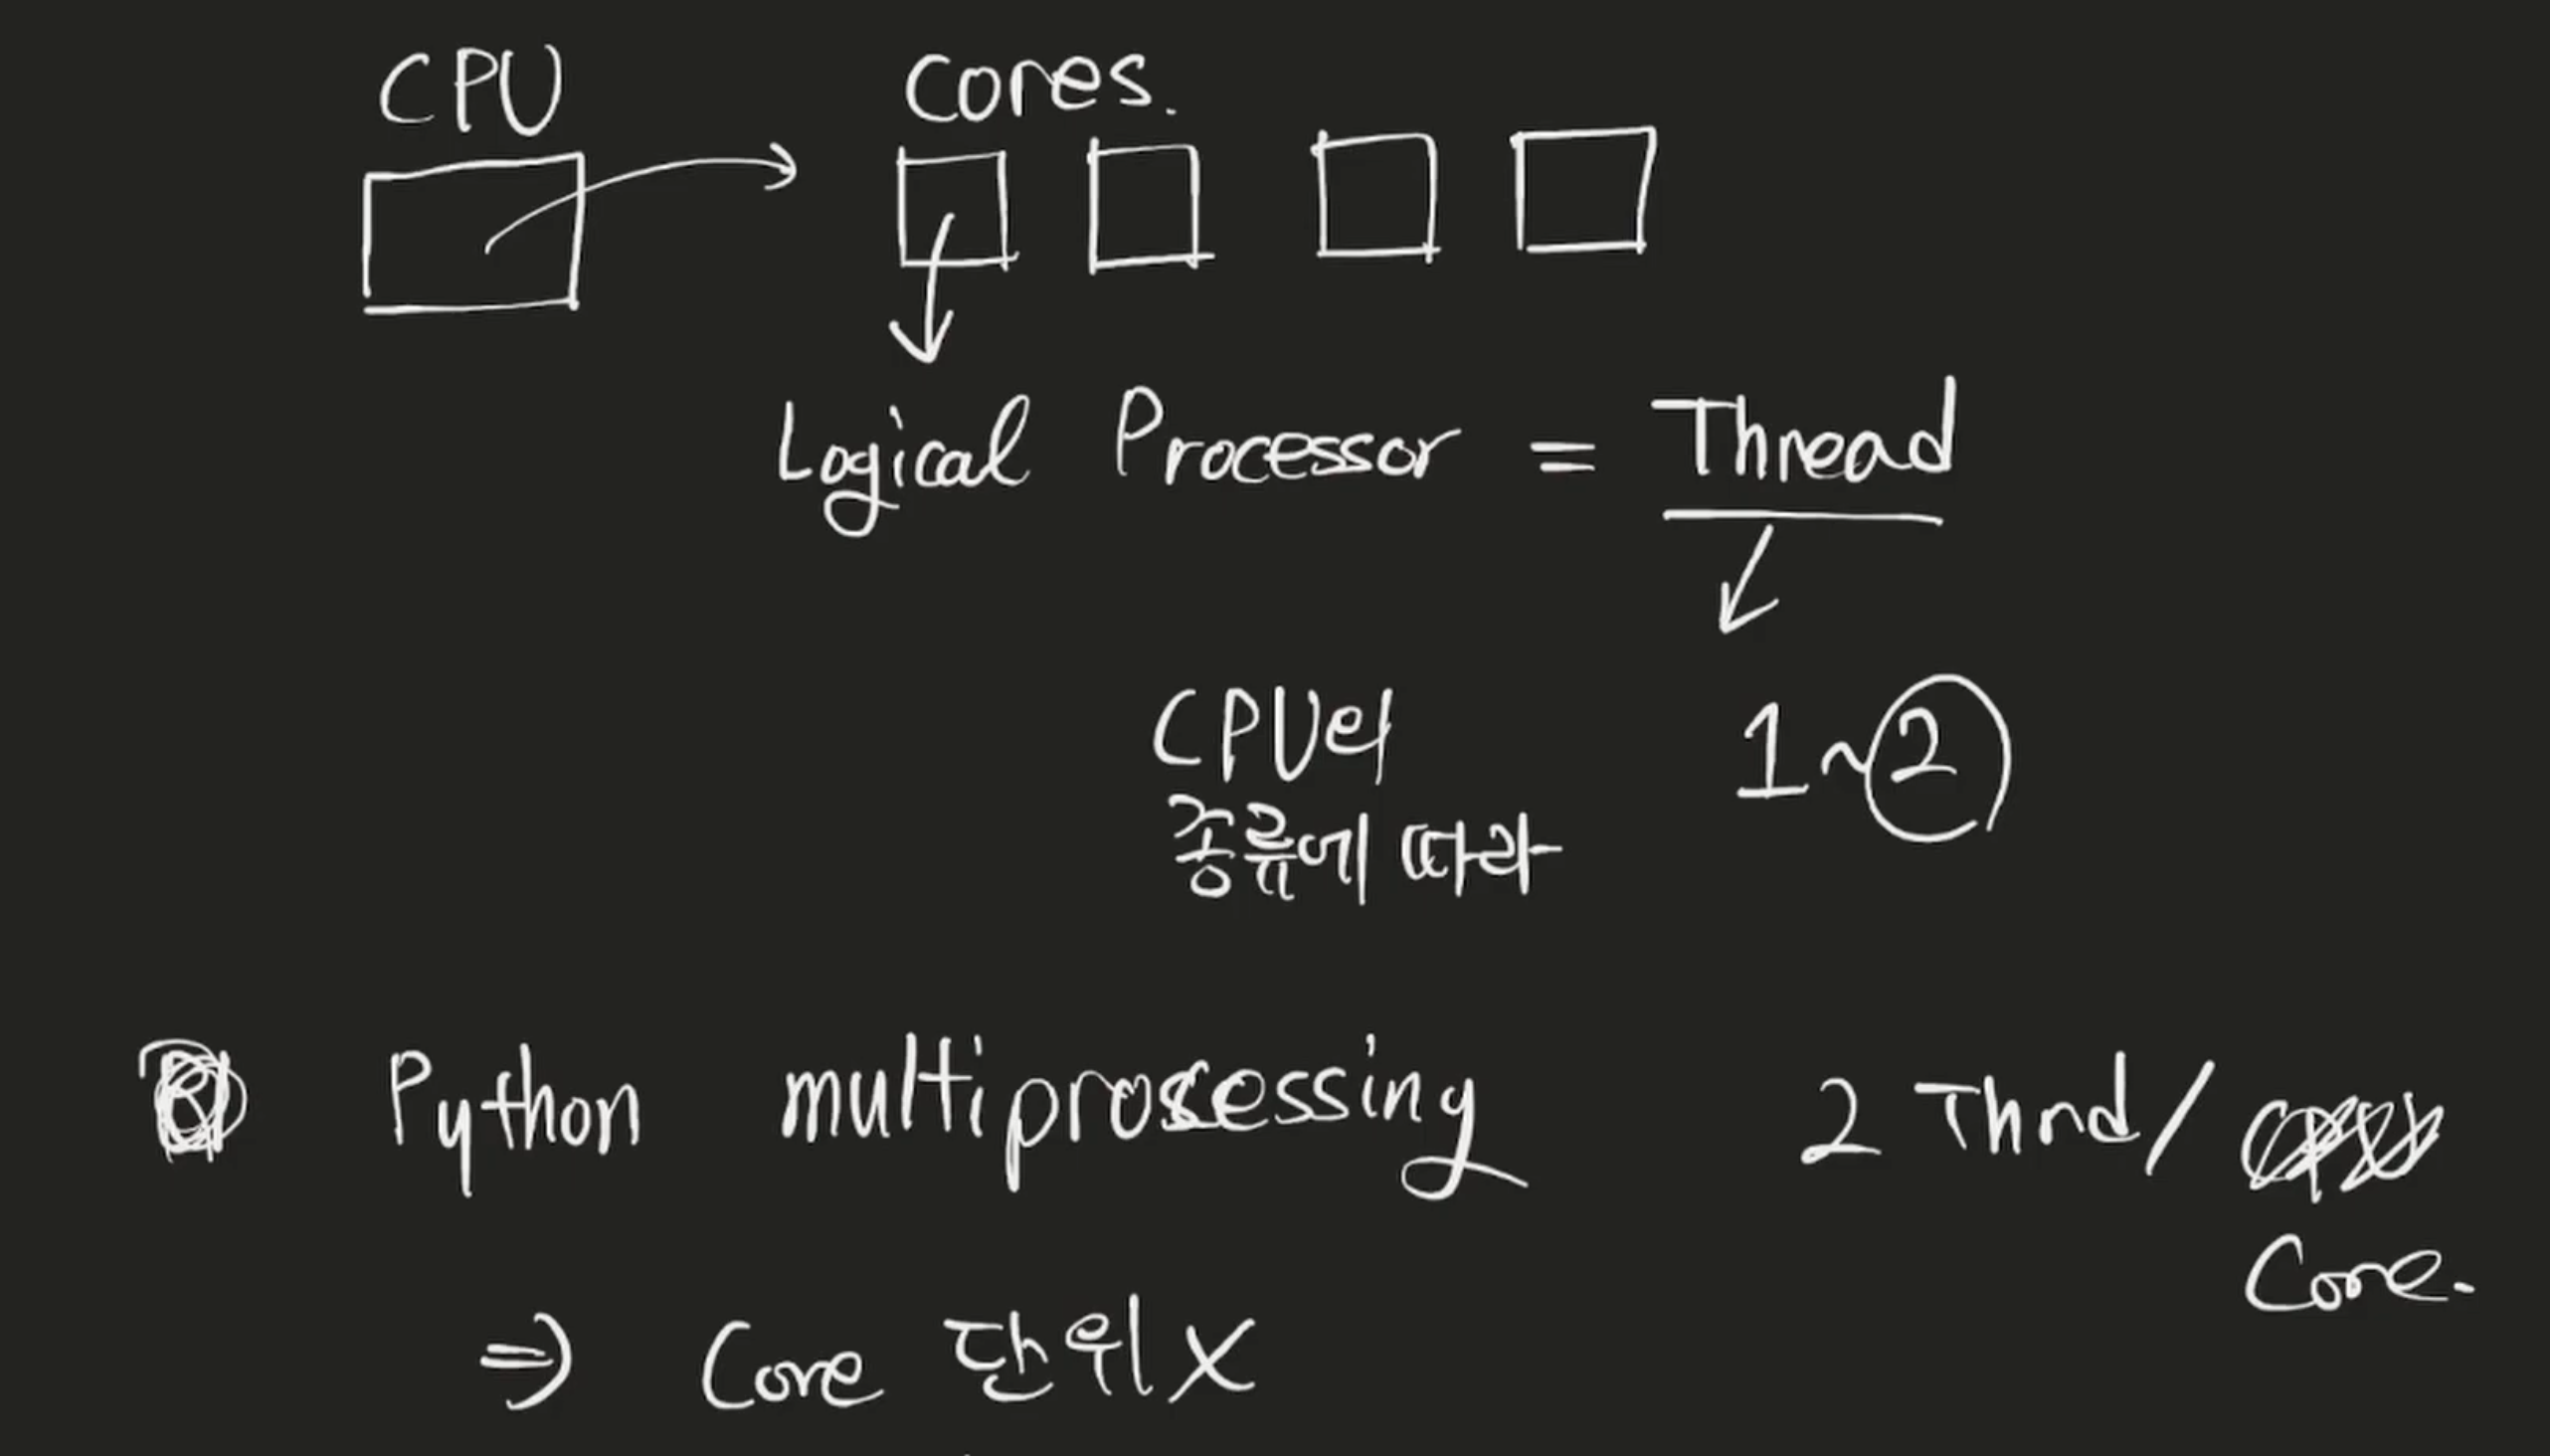

In [ ]:
import multiprocessing 



# XX. Pytorch things
이것은 그냥 pytorch related thigns to study

1. `torch.multiprocessing`
2. `torch.distributed`

* 여기서 뭐 공부할지는 준범쌤께 여쭙고 답변을 들은 후에, 그것들만 (엑기스) 만하기!

* 이거는 따로 .ipynb를 만들었으니, 그것을 쓰기!

In [105]:
os.listdir()

['PyTorch_distributed.ipynb',
 'try_signal.py',
 'IMP_python_prereqs.ipynb',
 '.ipynb_checkpoints']

In [17]:
#!ls ~ -a
!cat ~/.bashrc

# ~/.bashrc: executed by bash(1) for non-login shells.
# see /usr/share/doc/bash/examples/startup-files (in the package bash-doc)
# for examples

# If not running interactively, don't do anything
case $- in
    *i*) ;;
      *) return;;
esac

# don't put duplicate lines or lines starting with space in the history.
# See bash(1) for more options
HISTCONTROL=ignoreboth

# append to the history file, don't overwrite it
shopt -s histappend

# for setting history length see HISTSIZE and HISTFILESIZE in bash(1)
HISTSIZE=1000
HISTFILESIZE=2000

# check the window size after each command and, if necessary,
# update the values of LINES and COLUMNS.
shopt -s checkwinsize

# If set, the pattern "**" used in a pathname expansion context will
# match all files and zero or more directories and subdirectories.
#shopt -s globstar

# make less more friendly for non-text input files, see lesspipe(1)
[ -x /usr/bin/lesspipe ] && eval "$(SHELL=/bin/sh lesspipe)"

# set variable identifying the chroot you w

In [ ]:
/work2/08834/tg881334/stampede2/CHA_preproc/normal_CHA